# Hello GPT-4o
GPT-4o (“o” for “omni”) is a step towards much more natural human-computer interaction—it accepts as input any combination of text, audio, image, and video and generates any combination of text, audio, and image outputs. It can respond to audio inputs in as little as 232 milliseconds, with an average of 320 milliseconds, which is similar to human response time(opens in a new window) in a conversation. It matches GPT-4 Turbo performance on text in English and code, with significant improvement on text in non-English languages, while also being much faster and 50% cheaper in the API. GPT-4o is especially better at vision and audio understanding compared to existing models.

refer to this [URL](https://openai.com/index/hello-gpt-4o/) for more info and demos

In [2]:
import os
from dotenv import load_dotenv, find_dotenv
# find_dotenv() find .env automatically by walking up directories until it's found 
# load_dotenv() load the environment variables from the .env file
# override=True allows the .env file to override the system environment variables
load_dotenv(find_dotenv(), override=True)

apiKey = os.environ.get('OPENAI_API_KEY')
apiKey

'sk-proj-cMk4kcUBysfoo2TwGWd1T3BlbkFJVnhJVFpWTIu1qS1Gl2zk'

## Process Images as Input
- Both GPT-4o and GPT-4 Turbo have vision capabilities, meaning the models can take in images and answer questions about them.

Refer to this [URL](https://platform.openai.com/docs/guides/vision) for more info

In [3]:
!pip install ipython

### Load the image from the file system

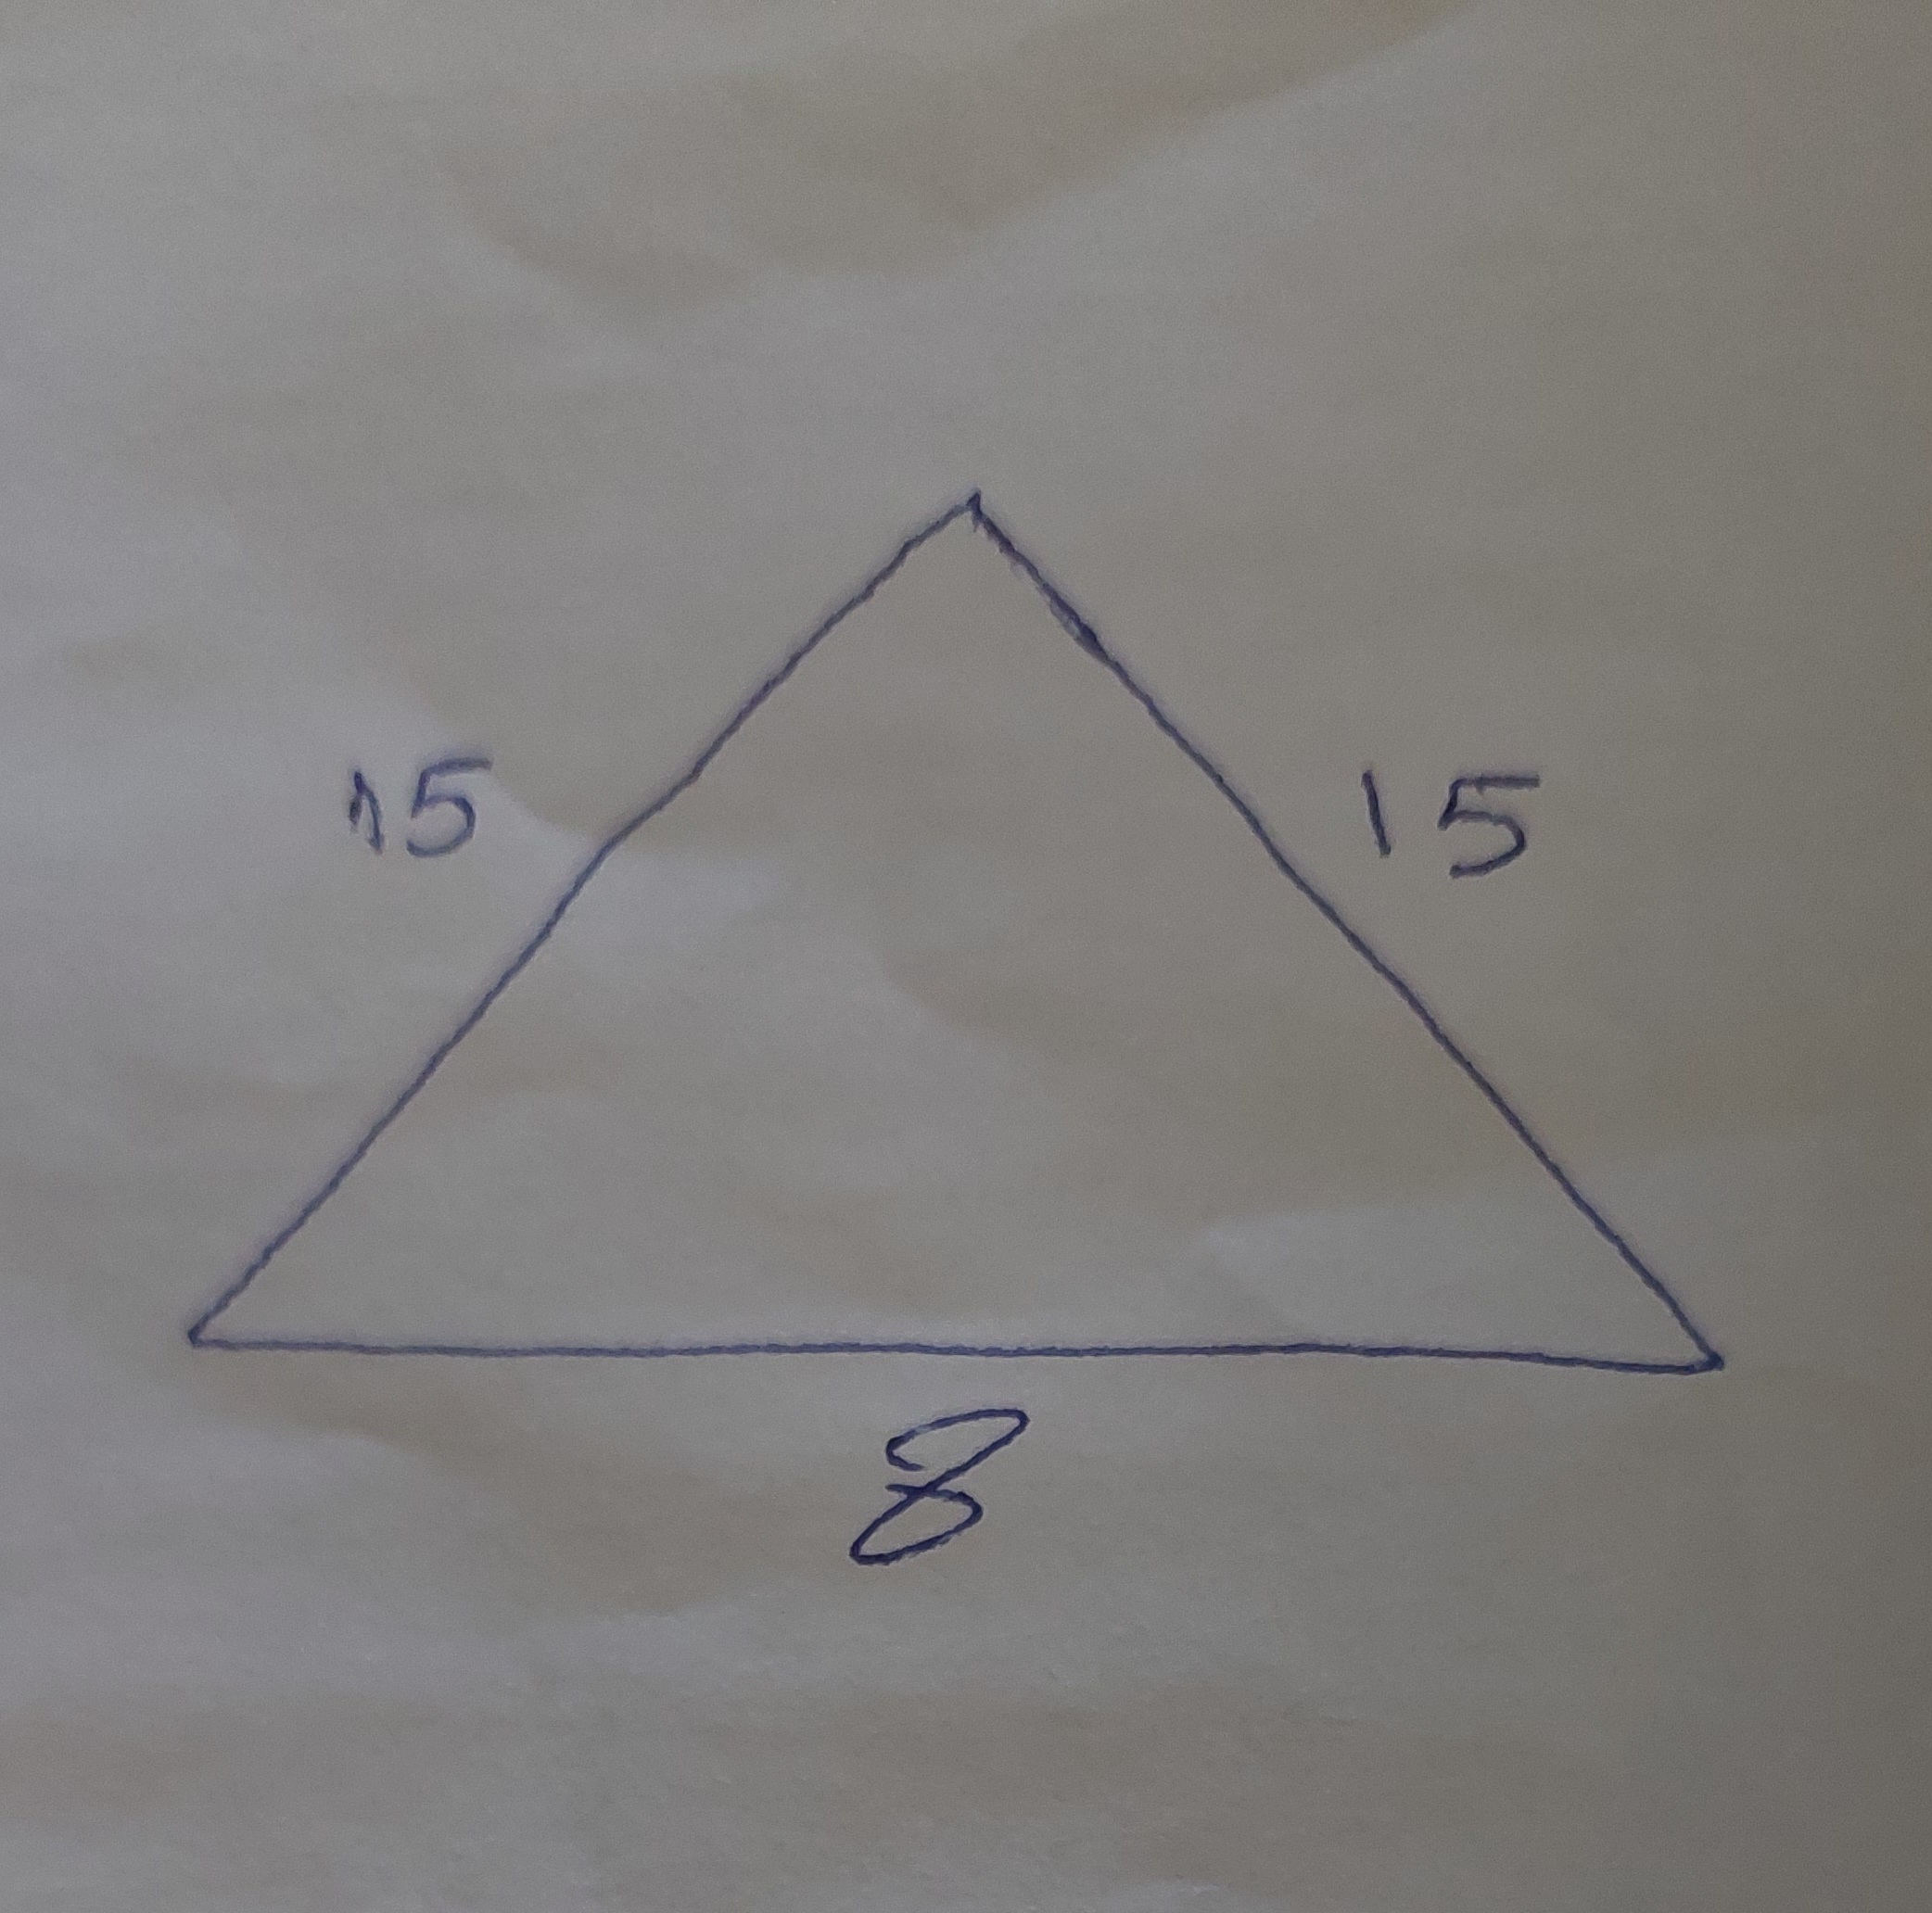

In [21]:
from IPython.display import display, Image
imagePath = "assets/image.jpg"
image_with_text = "assets/image-with-text.jpg"

display(Image(filename=imagePath))
    

### Create a Function to Encode the Image
- GPT-4o receive images in Base64 encoded format

In [7]:
import base64
def encode_image(imagePath):
    with open(imagePath, "rb") as imageFile:
        imageBytes = imageFile.read()
        return base64.b64encode(imageBytes).decode("utf-8")


In [16]:
from openai import OpenAI

openAi = OpenAI(api_key=apiKey)
base64Image = encode_image(imagePath)
response = openAi.chat.completions.create(
    model="gpt-4o",
    messages=[
            {"role": "system", "content": "You are a helpful math tutor."},
            {"role": "user", "content": [
            {"type": "text", "text": "What is the perimeter of this triangle ?"},
            {"type": "image_url", "image_url":{
                "url": f"data:image/jpg;base64,{base64Image}"}
		    }
        ]},  
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

To find the perimeter of the triangle, you need to add up the lengths of all its sides. The given side lengths are 15, 15, and 8.

Perimeter = 15 + 15 + 8 = 38

So, the perimeter of the triangle is 38 units.


### Process Image with text

In [22]:
base64Image = encode_image(image_with_text)
response = openAi.chat.completions.create(
    model="gpt-4o",
    messages=[
            {"role": "system", "content": "You are a helpful math tutor."},
            {"role": "user", "content": [
            {"type": "image_url", "image_url":{
                "url": f"data:image/jpg;base64,{base64Image}"}
		    }
        ]},  
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

To find the area of the triangle, we can use Heron's formula. Heron's formula states that the area of a triangle with sides \(a\), \(b\), and \(c\) is:

\[ \text{Area} = \sqrt{s(s-a)(s-b)(s-c)} \]

where \(s\) is the semi-perimeter of the triangle:

\[ s = \frac{a + b + c}{2} \]

In this triangle, the sides are \(a = 15\), \(b = 15\), and \(c = 8\).

First, calculate the semi-perimeter \(s\):

\[ s = \frac{15 + 15 + 8}{2} = \frac{38}{2} = 19 \]

Now, apply Heron's formula:

\[ \text{Area} = \sqrt{19(19-15)(19-15)(19-8)} \]
\[ \text{Area} = \sqrt{19 \cdot 4 \cdot 4 \cdot 11} \]
\[ \text{Area} = \sqrt{19 \cdot 16 \cdot 11} \]
\[ \text{Area} = \sqrt{3344} \]
\[ \text{Area} \approx 57.82 \]

So, the area of the triangle is approximately \(57.82\) square units.


### Use Online Images

In [26]:
imageUrl = "https://media.istockphoto.com/id/1170804921/photo/turtle-closeup-with-school-of-fish.jpg?s=1024x1024&w=is&k=20&c=VZM7Nztpjp7FKpg4ZGUCWJQndxxQ6oOr9zf0vR1v85Y="

base64Image = encode_image(image_with_text)
response = openAi.chat.completions.create(
    model="gpt-4o",
    messages=[
            {"role": "system", "content": "You are a helpful photography assistant responding in JSON."},
            {"role": "user", "content": [
            {"type": "text", "text": "write a short description about this image and give it a title ?"},
            {"type": "image_url", "image_url":{
                "url": imageUrl}
		    }
        ]},  
    ],
    temperature=0.0
)

print(response.choices[0].message.content)

```json
{
  "title": "Underwater Harmony",
  "description": "A captivating underwater scene featuring a sea turtle gracefully swimming near the ocean floor, surrounded by a school of silver fish. The clear blue water and sandy bottom create a serene and vibrant marine environment."
}
```
